In [30]:
from plantcv import plantcv as pcv
import numpy as np
import cv2

In [31]:
class options:
    def __init__(self):
        self.image = "C:/Users/Beth/Desktop/JL Lab/Egregious Pictures/Aww yikes/2019-07-22_0900(2).jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "./multi_plant_tutorial_results"
        self.outdir = "." # Store the output to the current directory 

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


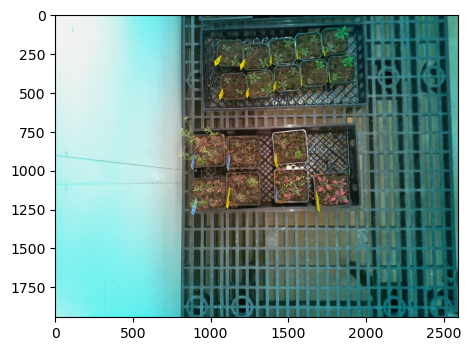

In [32]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
InputImage, path, filename = pcv.readimage(filename = args.image)

In [33]:
# Check if this is a night image, for some of these dataset's images were captured
# at night, even if nothing is visible. To make sure that images are not taken at
# night we check that the image isn't mostly dark (0=black, 255=white).
# if it is a night image it throws a fatal error and stops the workflow.

if np.average(InputImage) < 50:
    pcv.fatal_error("Night Image")
else:
    pass

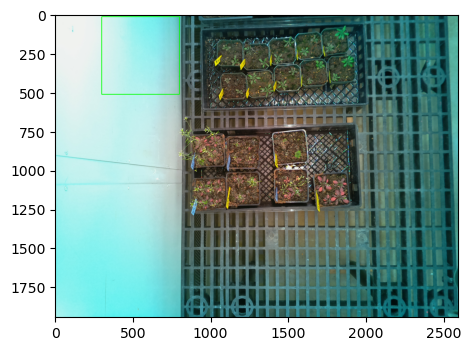

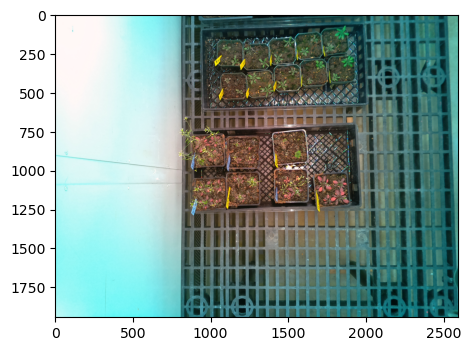

In [34]:
# Normalize the white color so you can later
# compare color between images.

# Inputs:
#   img = image object, RGB color space
#   roi = region for white reference, if none uses the whole image,
#         otherwise (x position, y position, box width, box height)

# white balance image based on white toughspot
WBImage = pcv.white_balance(InputImage, roi = (300,10,500,500))

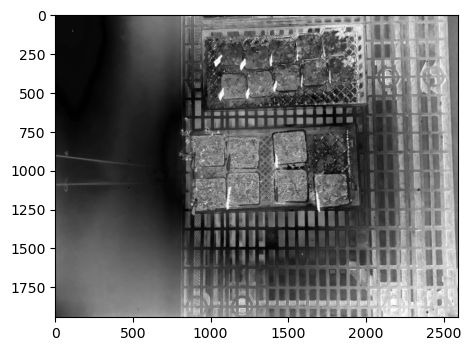

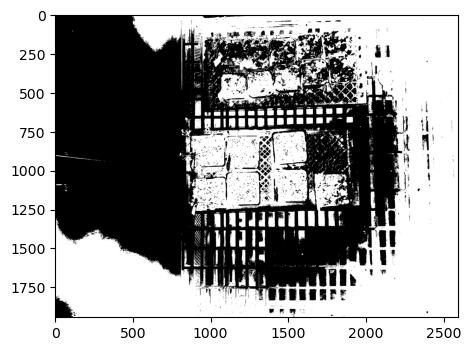

In [35]:
# Convert RGB to HSV and extract the saturation channel
# Then set threshold for saturation
#dark = background darker than object
#light = background lighter than object
YellowImage = pcv.rgb2gray_hsv(rgb_img = WBImage, channel = 's')
YellowThresh = pcv.threshold.binary(gray_img = YellowImage, 
                                    threshold=90, 
                                    max_value=255, 
                                    object_type='light')

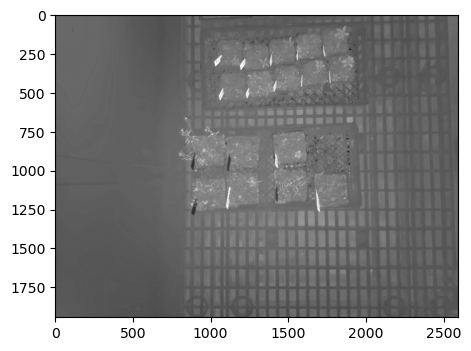

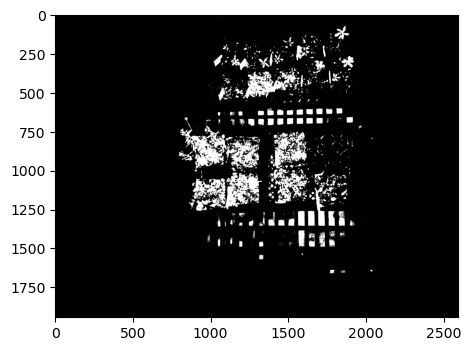

In [36]:
# Convert RGB to LAB and extract the blue channel
#Then threshold the image
BlueImage = pcv.rgb2gray_lab(rgb_img = WBImage, channel = 'b')
BlueThresh = pcv.threshold.binary(gray_img = BlueImage, 
                                  threshold=145, 
                                  max_value=255, 
                                  object_type='light')

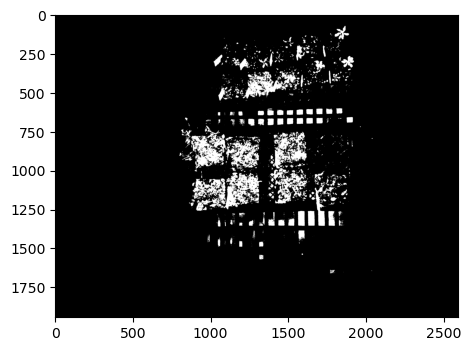

In [37]:
#Join the blue and yellow binary images
JoinedMask = pcv.logical_and(bin_img1 = YellowThresh, 
                             bin_img2 = BlueThresh)

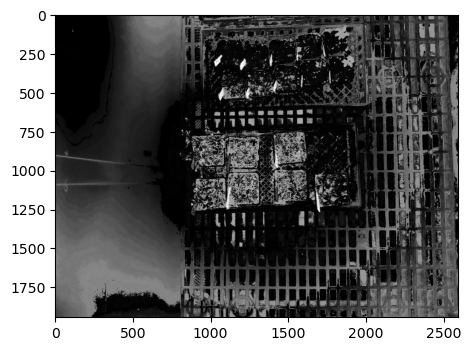

In [38]:
#Join the blue and yellow binary images
JoinedImage = pcv.logical_and(bin_img1 = YellowImage, bin_img2 = BlueImage)

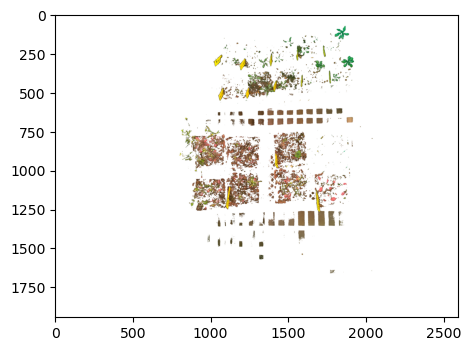

In [39]:
CheckMask = pcv.apply_mask(img = WBImage, 
                           mask = JoinedMask, 
                           mask_color = 'white')

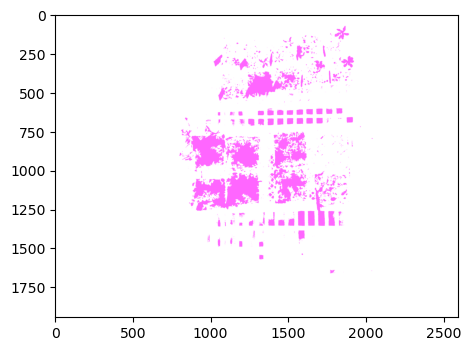

In [40]:
#identify objects
Object = IdentifiedObj, HierarchyObj = pcv.find_objects(img = CheckMask, 
                                                     mask = JoinedMask)

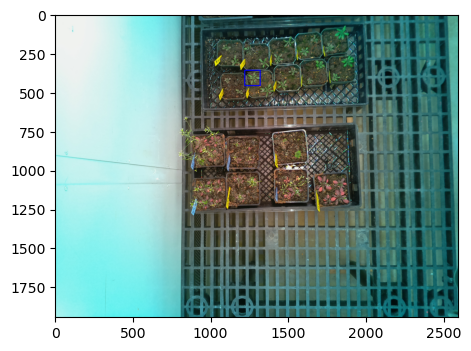

In [41]:
#Define Range of Intrest
# Inputs: 
    #   img - RGB or grayscale image to plot the ROI on 
    #   x - The x-coordinate of the upper left corner of the rectangle 
    #   y - The y-coordinate of the upper left corner of the rectangle 
    #   h - The height of the rectangle 
    #   w - The width of the rectangle 
Roi, HierarchyRoi = pcv.roi.rectangle(img = InputImage, 
                                       x=1220, 
                                       y=355, 
                                       h=100, 
                                       w=100)

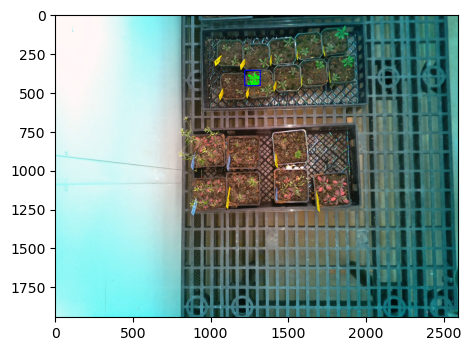

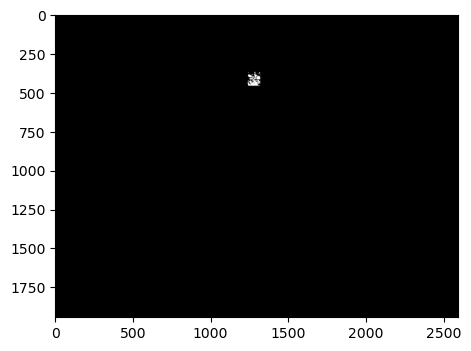

In [42]:
# Decide which objects to keep

    # Inputs:
    #    img            = img to display kept objects
    #    roi_contour    = contour of roi, output from any ROI function
    #    roi_hierarchy  = contour of roi, output from any ROI function
    #    object_contour = contours of objects, output from pcv.find_objects function
    #    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
    #    roi_type       = 'partial' (default, for partially inside), 'cutto', or 
    #    'largest' (keep only largest contour)
CroppedMask = pcv.roi_objects(img = WBImage, roi_contour = Roi, 
                                roi_hierarchy = HierarchyRoi,
                                object_contour = IdentifiedObj,
                                obj_hierarchy = HierarchyObj,
                                roi_type = 'cutto')


In [52]:
# Skeletonize the mask
skeleton = pcv.morphology.skeletonize(CroppedMask)

AttributeError: 'tuple' object has no attribute 'astype'